In [17]:
# Import ImageIO
import imageio
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Load "chest-220.dcm"
im = imageio.imread('data/chest-ct/chest-220.dcm')

# Print image attributes
print('Image type:', type(im))
print('Shape of image array:', im.shape)

Image type: <class 'imageio.core.util.Array'>
Shape of image array: (512, 512)


- imageio is a versatile package. It can read in a variety of image data, including JPEG, PNG, and TIFF. But it's especially useful for its ability to handle DICOM files.

### Metadata
- ImageIO reads in data as Image objects. These are standard NumPy arrays with a dictionary of metadata.

- Metadata can be quite rich in medical images and can include:

- Patient demographics: name, age, sex, clinical information
- Acquisition information: image shape, sampling rates, data type, modality (such as X-Ray, CT or MRI)


In [11]:
im = imageio.imread('data/chest-ct/chest-220.dcm')

# Print the available metadata fields
print(im.meta.keys())

odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])


In [12]:
print(im.meta)

Dict([('TransferSyntaxUID', '1.2.840.10008.1.2'), ('SOPClassUID', '1.2.840.10008.5.1.4.1.1.2'), ('SOPInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.290866807370146801046392918286'), ('StudyDate', '20040529'), ('SeriesDate', '20040515'), ('ContentDate', '20040515'), ('StudyTime', '115208'), ('SeriesTime', '115254'), ('ContentTime', '115325'), ('Modality', 'CT'), ('Manufacturer', 'GE MEDICAL SYSTEMS'), ('StudyDescription', 'PET CT with registered MR'), ('SeriesDescription', 'CT IMAGES - RESEARCH'), ('PatientName', 'STS_007'), ('PatientID', 'STS_007'), ('PatientBirthDate', ''), ('PatientSex', 'F '), ('PatientWeight', 82.0), ('StudyInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.381397737790414481604846607090'), ('SeriesInstanceUID', '1.3.6.1.4.1.14519.5.2.1.5168.1900.315477836840324582280843038439'), ('SeriesNumber', 2), ('AcquisitionNumber', 1), ('InstanceNumber', 57), ('ImagePositionPatient', (-250.0, -250.0, -180.62)), ('ImageOrientationPatient', (1.0, 0.0, 0.0, 0.0, 1.0, 0.0)), ('S

- DICOM files have rich information related to patient and acquisition information, but other image formats can have helpful information as well.

### Plot images

- Matplotlib's imshow() function gives you a simple way to do this. Knowing a few simple arguments will help:

1. cmap controls the color mappings for each value. The "gray" colormap is common, but many others are available.
2. vmin and vmax control the color contrast between values. Changing these can reduce the influence of extreme values.
3. plt.axis('off') removes axis and tick labels from the image.

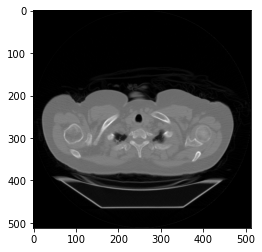

In [13]:
# Read in "chest-220.dcm"
im = imageio.imread('data/chest-ct/chest-220.dcm')
# Draw the image in grayscale
plt.imshow(im, cmap='gray')

# Render the image
plt.show()

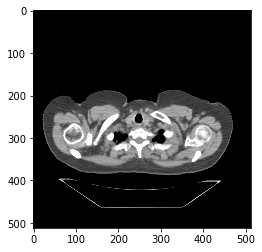

In [14]:
# Draw the image with greater contrast
plt.imshow(im, vmin=-200, vmax=200, cmap='gray')

# Render the image
plt.show()

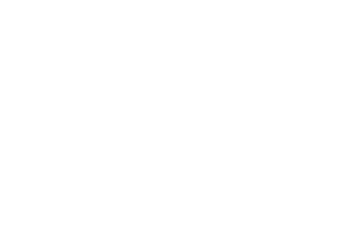

In [15]:
# Remove axis ticks and labels
plt.axis('off')

# Render the image
plt.show()

- Manipulating cmap, vmin, and vmax will give you the flexibility to plot all types of data. Remember, though, that they only affect the plot and not the underlying data.

### Stack images
- Image "stacks" are a useful metaphor for understanding multi-dimensional data. Each higher dimension is a stack of lower dimensional arrays.
- We will use NumPy's stack() function to combine several 2D arrays into a 3D volume. By convention, volumetric data should be stacked along the first dimension: `vol[plane, row, col]`
- Note: performing any operations on an ImageIO Image object will convert it to a numpy.ndarray, stripping its metadata.

In [18]:
# Read in each 2D image
im1 = imageio.imread('data/chest-ct/chest-220.dcm')
im2 = imageio.imread('data/chest-ct/chest-221.dcm')
im3 = imageio.imread('data/chest-ct/chest-222.dcm')

# Stack images into a volume
vol = np.stack([im1, im2, im3], axis=0)
print('Volume dimensions:', vol.shape)

Volume dimensions: (3, 512, 512)


### Load volumes
- ImageIO's volread() function can load multi-dimensional datasets and create 3D volumes from a folder of images. It can also aggregate metadata across these multiple images.

In [19]:
# Load the "tcia-chest-ct" directory
vol = imageio.volread("data/chest-ct/")

# Print image attributes
print('Available metadata:', vol.meta.keys())
print('Shape of image array:', vol.shape)

Reading DICOM (examining files): 1/5 files (20.0%5/5 files (100.05/5 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 5/5  (100.0%)
Available metadata: odict_keys(['TransferSyntaxUID', 'SOPClassUID', 'SOPInstanceUID', 'StudyDate', 'SeriesDate', 'ContentDate', 'StudyTime', 'SeriesTime', 'ContentTime', 'Modality', 'Manufacturer', 'StudyDescription', 'SeriesDescription', 'PatientName', 'PatientID', 'PatientBirthDate', 'PatientSex', 'PatientWeight', 'StudyInstanceUID', 'SeriesInstanceUID', 'SeriesNumber', 'AcquisitionNumber', 'InstanceNumber', 'ImagePositionPatient', 'ImageOrientationPatient', 'SamplesPerPixel', 'Rows', 'Columns', 'PixelSpacing', 'BitsAllocated', 'BitsStored', 'HighBit', 'PixelRepresentation', 'RescaleIntercept', 'RescaleSlope', 'PixelData', 'shape', 'sampling'])
Shape of image array: (5, 512, 512)


- Using volread() to load image volumes can be faster and more reliable than loading them in image-by-image. It also preserves image metadata where possible.

### Field of view
- The amount of physical space covered by an image is its field of view, which is calculated from two properties:

1. Array shape, the number of data elements on each axis. Can be accessed with the shape attribute.
2. Sampling resolution, the amount of physical space covered by each pixel. Sometimes available in metadata (e.g., meta['sampling']).
